# Python pour le Machine Learning : SKLEARN PRE-PROCESSING + PIPELINE


## 1. Intro

Le data processing est l'une des étapes les plus importantes pour développer des modèles avec de bonnes performances. 

Nous allons commencer par voir ce qu'est le data processing. Je vous montrerai les différentes techniques à connaître. 

Ensuite, nous verrons comment les mettre en œuvre avec Scikit-learn et comment construire une chaîne de transformation avec la classe Pipeline de Scikit-learn.

## 2. Pre-Processing

Comme vous le savez, les algorithmes de machine learning apprennent à partir des données qui leur sont fournies. Par conséquent, si ces données sont de mauvaise qualité, erronées, incomplètes ou redondantes, alors l'algorithme qui en résulte sera lui-même de mauvaise qualité, puisqu'il est censé refléter ce qu'il voit dans les données. 

C'est pour cette raison qu'il est impératif de bien préparer nos données avant leur traitement. Il faut les nettoyer, les filtrer et les normaliser. C'est cette étape qu'on appelle le preprocessing ou, en français, le prétraitement des données.

Parmi les opérations de preprocessing les plus importantes, on trouve :

- L'encodage, qui consiste à convertir les données qualitatives en valeurs numériques.
- La normalisation, qui permet de mettre sur une même échelle toutes les variables quantitatives, facilitant ainsi l'apprentissage de la machine.
- L'imputation, qui permet de remplacer les données manquantes par certaines valeurs statistiques.
- La sélection de variables, qui utilise des tests statistiques comme le test de chi² pour sélectionner les variables les plus utiles au développement d'un modèle.
- L'extraction de caractéristiques, qui consiste à générer de nouvelles variables à partir d'informations cachées dans le dataset.

![Python_Seaborn_Fig_000087.png](./images/Python_Seaborn_Fig_000087.png)

Pour effectuer toutes ces opérations, Scikit-learn a développé différents modules : un module de preprocessing, qui permet d'effectuer des transformations, d'encodage, de normalisation, et quelques autres opérations. Un module d'imputation, un module de feature selection et, pour finir, un module de feature extraction. 

Nous allons nous concentrer exclusivement sur le module de preprocessing, car il contient les opérations les plus importantes à connaître en machine learning.

## 3. Transformer Sklearn

Dans Sklearn, surnommé Scikit-learn, on retrouve deux éléments principaux : d'un côté, on a des classes appelées "transformers" (ou transformateurs en français) que l'on peut facilement repérer puisqu'elles commencent toutes par une majuscule. 

D'un autre côté, on a de simples routines ou fonctions mathématiques. 

Ce qui nous intéresse le plus, ce sont ces transformers, car ils offrent une interface de programmation extrêmement utile pour faire du preprocessing.
![Python_Seaborn_Fig_000089.png](./images/Python_Seaborn_Fig_000089.png)

En effet, cette interface permet de traiter l'ensemble de nos données de manière cohérente en transformant chaque donnée future de la même manière que l'on avait transformé les données qui ont servi à l'entraînement de la machine. 

Cela permet au modèle de machine learning, qui vient après le transformer, de bien fonctionner
![Python_Seaborn_Fig_000089.png](./images/Python_Seaborn_Fig_000090.png)

car il reçoit toujours des données cohérentes avec ce qu'il a appris. 
![Python_Seaborn_Fig_000089.png](./images/Python_Seaborn_Fig_000091.png)

Pour transformer ces données de manière cohérente, les transformers disposent de deux méthodes : une méthode "fit" qui permet de développer une fonction de transformation en analysant les données du train set, et une méthode "transform" qui permet d'appliquer cette fonction de transformation sur toutes les données qu'on lui fournit, c'est-à-dire aussi bien les données du train set que celles du test set ou même les données futures. 
![Python_Seaborn_Fig_000089.png](./images/Python_Seaborn_Fig_000093.png)

In [1]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [2]:
X = np.array(['Chat', 'Chien', 'Chat','Oiseau'])

tranformer = LabelEncoder()
tranformer.fit(X)

LabelEncoder()

In [3]:
tranformer.transform(X)

array([0, 1, 0, 2])

Pour gagner en efficacité, il existe une troisième méthode appelée "fit_transform" qui combine les méthodes "fit" et "transform".

In [4]:
tranformer.fit_transform(X)

array([0, 1, 0, 2], dtype=int64)

Donc, dans la pratique, quand on désire développer un modèle de machine learning, on commence par diviser notre dataset en deux parties : un train set et un test set. 

Avec les données du train set, nous développons une fonction de transformation, ce qui permet de traiter nos données pour ensuite entraîner un estimateur. 
![Python_Seaborn_Fig_000089.png](./images/Python_Seaborn_Fig_000094.png)

Une fois cette étape terminée, nous pouvons utiliser le transformer et l'estimateur, tels qu'ils ont été développés, pour transformer les données du test set et faire de nouvelles prédictions.
![Python_Seaborn_Fig_000089.png](./images/Python_Seaborn_Fig_000095.png)

En combinant ainsi un transformer avec un estimateur, nous obtenons une "pipeline", c'est-à-dire une chaîne de transformation. 
![Python_Seaborn_Fig_000089.png](./images/Python_Seaborn_Fig_000096.png)

## 4. Encodage Ordinal

Pour commencer, nous allons voir ensemble les transformers d'encodage. Quand on développe un modèle de machine learning ou de deep learning, il est nécessaire de présenter à la machine des valeurs numériques avec lesquelles elle puisse faire des calculs. 

Par conséquent, si notre dataset contient des données qualitatives sous forme de mots, il est indispensable de convertir ces données en valeur numérique. C'est ce qu'on appelle l'encodage. 

Dans Scikit-learn, il existe cinq transformers d'encodage : LabelEncoder, LabelBinarizer, MultiLabelBinarizer, OrdinalEncoder, et OneHotEncoder. Ces transformers permettent d'effectuer deux types d'encodage, à savoir l'encodage ordinal et l'encodage one-hot.
![Python_Seaborn_Fig_000089.png](./images/Python_Seaborn_Fig_000097.png)

L'encodage ordinal consiste tout simplement à associer chaque catégorie d'une variable à une valeur décimale unique. 

Par exemple, la catégorie "chat" est associée à 0, "chien" à 1, "oiseau" à 2, etc. Pour cela, on dispose des transformers LabelEncoder et OrdinalEncoder. 
![Python_Seaborn_Fig_000089.png](./images/Python_Seaborn_Fig_000098.png)

Le transformer LabelEncoder a été conçu spécialement pour encoder la variable y, c'est-à-dire qu'en principe, ce transformer ne permet de traiter qu'une seule colonne. 
![Python_Seaborn_Fig_000089.png](./images/Python_Seaborn_Fig_000099.png)

Pour s'en servir, il faut commencer par créer un objet de la classe LabelEncoder. 

Puis, pour cet encodeur, il va falloir le développer grâce à la méthode fit dans laquelle on va faire passer notre tableau y. 

Cela retourne donc une fonction de transformation. 

À ce stade, on peut utiliser notre transformer pour traiter nos données avec la méthode transform. 

Pour aller plus vite, on peut également utiliser la méthode fit_transform. 

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [6]:
y = np.array(['chat', 'chien', 'chat', 'oiseau'])

encoder = LabelEncoder()
encoder.fit_transform(y)

array([0, 1, 0, 2], dtype=int64)

Pour certains transformers, dont le transformer LabelEncoder, il existe une méthode inverse_transform qui permet d'appliquer la transformation dans le sens inverse. Ainsi, si on a entraîné un modèle de machine learning à identifier des animaux – chats, chiens, oiseaux – mais que ce modèle nous donne des valeurs numériques comme 0, 1, 2 et que nous ne savons pas vraiment à quoi elles correspondent, on va utiliser notre encodeur avec la méthode inverse_transform.

In [7]:
encoder.inverse_transform(np.array([0, 0, 2]))

array(['chat', 'chat', 'oiseau'], dtype='<U6')

À présent, si on désire encoder un tableau qui contient plusieurs variables, le transformer LabelEncoder ne va pas fonctionner. 

Si l'on crée un objet LabelEncoder et qu'on veut utiliser fit_transform sur le tableau X, cela va retourner une erreur indiquant que les dimensions ne sont pas adaptées à cette fonction. 

In [8]:
X = np.array([['Chat', 'Poils'], ['Chien', 'Poils'], ['Chat', 'Poils'], ['Oiseau', 'Plume']])

#encoder = LabelEncoder()
#encoder.fit_transform(X)

![Python_Seaborn_Fig_000128.png](./images/Python_Seaborn_Fig_000128.png)

Donc, à la place d'utiliser LabelEncoder, il faut utiliser le transformer OrdinalEncoder, qui fait exactement la même chose que le LabelEncoder, sauf qu'il est conçu pour traiter plusieurs variables à la fois. 
![Python_Seaborn_Fig_000089.png](./images/Python_Seaborn_Fig_000100.png)

In [9]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
encoder.fit_transform(X)

array([[0., 1.],
       [1., 1.],
       [0., 1.],
       [2., 0.]])

Cependant, l'inconvénient avec cette technique d'encodage est que d'un point de vue arithmétique, cela reviendrait à dire qu'un chat est inférieur à un chien, qu'un chien est inférieur à un oiseau, ce qui n'a aucun sens car ces catégories ne sont pas ordinales. 
![Python_Seaborn_Fig_000089.png](./images/Python_Seaborn_Fig_000101.png)

Cela risque donc de pénaliser la plupart des modèles de machine learning, à l'exception des modèles basés sur les arbres de décision car ils ne sont pas sensibles aux relations d'ordre. 

## 5. Encodage One-Hot

Au lieu de l'encodage ordinal, il existe un autre type d'encodage : l'encodage one-hot. 

Avec cette technique, chaque catégorie ou classe est représentée de façon binaire dans une colonne qui lui est propre. On décompose ainsi la variable initiale en plusieurs sous-variables, créant donc autant de colonnes qu'il y a de catégories ou de classes dans cette variable. 

De cette manière, les algorithmes de machine learning ne peuvent plus comparer les valeurs "chats", "chiens" et "oiseaux" sur un seul et même axe, car ces catégories sont désormais séparées en plusieurs dimensions. 

Pour ce faire dans Scikit-learn, on dispose de trois transformers : le transformer LabelBinarizer, MultiLabelBinarizer, et OneHotEncoder. 
![Python_Seaborn_Fig_000102.png](./images/Python_Seaborn_Fig_000102.png)

En guise de démonstration, si cette fois-ci nous créons un objet LabelBinarizer et que nous utilisons la méthode fit_transform pour traiter nos données y, on obtient un tableau. 

In [10]:
from sklearn.preprocessing import LabelBinarizer

y = np.array(['chat', 'chien', 'chat', 'oiseau'])

encoder = LabelBinarizer()
encoder.fit_transform(y)

array([[1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1]])

## 6. Matrice Sparse (ou Matrice Creuse)

Beaucoup de gens pensent que l'encodage One-Hot présente un inconvénient, en particulier lorsque nous avons un grand nombre de catégories, comme plusieurs centaines de villes dans un dataset immobilier.
![Python_Seaborn_Fig_000103.png](./images/Python_Seaborn_Fig_000103.png)

Le résultat de l'encodage One-Hot va donner un tableau extrêmement large et difficile à manipuler. Cependant, ce n'est pas vraiment un problème, car ce tableau, bien qu'il soit très large, n'occupera pas beaucoup de mémoire sur nos ordinateurs. 

La raison en est que nous avons affaire à une matrice creuse (en anglais, "sparse matrix"), une matrice majoritairement remplie de zéros. Cette matrice peut être représentée dans un format très léger où le chiffre zéro n'est simplement pas stocké dans la mémoire, car il est inutile.

Par exemple, pour une matrice 5x5 donnée, nous pouvons stocker cette matrice dans trois petits tableaux : un tableau pour enregistrer les valeurs non nulles (telles que a, b, et c), un tableau pour enregistrer les lignes de ces valeurs, et un tableau pour enregistrer les colonnes de ces valeurs. Ainsi, la matrice est stockée dans un format appelé "coordinate" (COO). 
![Python_Seaborn_Fig_000103.png](./images/Python_Seaborn_Fig_000104.png)

Bien que ce format ne soit pas utilisé dans Scikit-learn, celui qui est utilisé est le format CSR ("Compressed Sparse Row"). C'est un format un peu plus complexe mais similaire.

Lorsque vous réalisez un encodage One-Hot avec Scikit-learn, vous avez la possibilité de choisir si votre résultat doit être compressé ou non. 

Par exemple, avec le transformer OneHotEncoder, c'est même le choix par défaut. 

In [11]:
encoder = LabelBinarizer(sparse_output=True)
encoder.fit_transform(y)

<4x3 sparse matrix of type '<class 'numpy.int32'>'
	with 4 stored elements in Compressed Sparse Row format>

Si vous effectuez un encodage One-Hot sur toutes vos variables, vous obtiendrez un tableau très large, et Scikit-learn compressera par défaut votre résultat au format CSR.
![Python_Seaborn_Fig_000105.png](./images/Python_Seaborn_Fig_000105.png)

In [12]:
from sklearn.preprocessing import OneHotEncoder

X = np.array([['Chat', 'Poils'], ['Chien', 'Poils'], ['Chat', 'Poils'], ['Oiseau', 'Plume']])

encoder = OneHotEncoder()
encoder.fit_transform(X)

<4x5 sparse matrix of type '<class 'numpy.float64'>'
	with 8 stored elements in Compressed Sparse Row format>

Cependant, une remarque importante : à partir de la version 0.22, les transformers de Scikit-learn ne peuvent pas gérer l'apparition de nouvelles catégories dans vos données. 
![Python_Seaborn_Fig_000106.png](./images/Python_Seaborn_Fig_000106.png)

Ils renverront une erreur s'ils rencontrent une catégorie qu'ils n'ont jamais vue dans le training set. 

En théorie, si le travail est bien fait, cette erreur ne devrait pas survenir. 

Néanmoins, beaucoup de data scientists préfèrent créer leurs propres fonctions d'encodage au lieu de dépendre de celles de Scikit-learn. 

Cependant, les transformers de Scikit-learn sont extrêmement utiles et sont couramment utilisés malgré ce petit défaut, qui pourrait un jour être corrigé.

## 7. Normalisation : Min-Max

En data science, il est indispensable de normaliser nos données quantitatives, c'est-à-dire les mettre toutes sur une même échelle. Cela facilite considérablement l'apprentissage des modèles de machine learning qui sont basés sur la descente de gradient, les calculs de distance ou les calculs de variance. 

Par exemple, dans le cas d'une descente de gradient, lorsqu'une variable prend le dessus sur une autre, il devient plus difficile pour la fonction coût de converger vers son minimum. C'est pourquoi il est très important de normaliser nos données avant de les soumettre à la machine.
![Python_Seaborn_Fig_000107.png](./images/Python_Seaborn_Fig_000107.png)

Il existe de nombreuses techniques de normalisation. Ensemble, nous allons voir les trois plus connues : la normalisation MinMax, la standardisation et le transformeur robuste.
![Python_Seaborn_Fig_000107.png](./images/Python_Seaborn_Fig_000108.png)

Dans Scikit-learn, la normalisation MinMax transforme chaque variable de manière à ce que ses valeurs soient toutes comprises entre 0 et 1. 
![Python_Seaborn_Fig_000107.png](./images/Python_Seaborn_Fig_000109.png)

Pour cela, on soustrait chaque valeur d'une variable à son minimum, puis on divise par la différence entre le maximum et le minimum de cette variable. 

Par exemple, avec les valeurs 70, 80 et 120, qui pourraient représenter des surfaces d'appartements, en utilisant simplement le scaler de la classe MinMaxScaler, on obtiendra les résultats suivants : 0, 0.2 et 1.

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
X = np.array([[70], [80], [120]])

scaler = MinMaxScaler()
scaler.fit_transform(X)

array([[0. ],
       [0.2],
       [1. ]])

Vous pourriez penser que si nous modifions nos données de cette manière, elles perdraient leur sens. Que notre modèle ne comprendrait pas l'information concernant nos véritables surfaces. 

Cependant, en réalité, nous ne perdons aucune information car les normalisations conservent les rapports de distance présents dans nos données originales. L'écart entre 0 et 0.2 est complètement équivalent à l'écart entre 70 et 80. 

Pour notre machine, cela ne change absolument rien. Bien sûr, lorsque nous souhaitons utiliser notre modèle sur de nouvelles données, comme un appartement de 90 mètres carrés, nous devons également normaliser ces données en appliquant la même transformation.

In [15]:
X_test = np.array([[90]])
scaler.transform(X_test)

array([[0.4]])

Pour être honnête, si vous avez compris cela, si vous comprenez ce calcul, alors vous avez saisi le concept du transformer.
![Python_Seaborn_Fig_000110.png](./images/Python_Seaborn_Fig_000110.png)

Revenons à notre code. Pour bien visualiser l'effet de la normalisation MinMax, je vous propose de charger le dataset des fleurs d'Iris. Vous connaissez déjà ce dataset. Il nous fournit le nuage de points suivant. 

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

from sklearn.preprocessing import MinMaxScaler

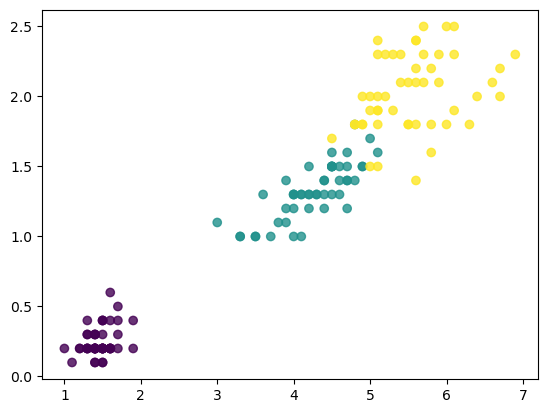

In [17]:
iris = load_iris()
X = iris.data
y = iris.target

plt.scatter(X[:, 2], X[:, 3], c=y, alpha=0.8)

Si nous voulions normaliser nos données, tout ce que nous aurions à faire serait d'utiliser MinMaxScaler pour entraîner nos données X. 

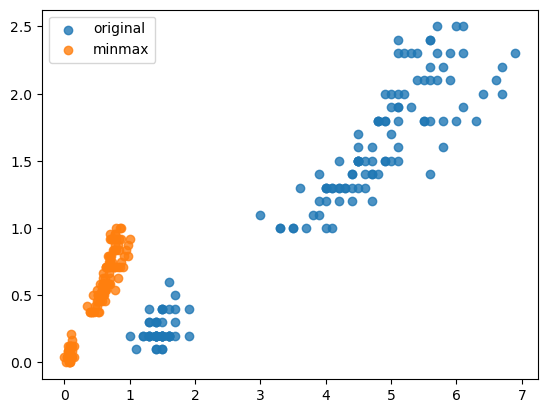

In [18]:
X_minmax = MinMaxScaler().fit_transform(X)

plt.scatter(X[:, 2], X[:, 3], alpha=0.8, label = "original")
plt.scatter(X_minmax[:, 2], X_minmax[:, 3], alpha=0.8, label = "minmax")
plt.legend()
plt.show()

Nous pouvons constater que toutes nos données sont maintenant entre 0 et 1.

## 8. Standardisation

Cette technique consiste à transformer nos données de telle sorte que chaque variable ait une moyenne égale à zéro et un écart-type égal à 1.
![Python_Seaborn_Fig_000111.png](./images/Python_Seaborn_Fig_000111.png)

Pour cela, il faut soustraire chaque valeur à la moyenne initiale de notre variable et diviser le tout par l'écart type initial de notre variable. On obtient ainsi des données simples à utiliser pour la plupart des modèles statistiques, comme les support vector machines ou bien les décompositions principal component analysis. 

Donc, si on reprend l'exemple précédent avec les données 70, 80, 120, en remplaçant MinMaxScaler par un StandardScaler, on obtient -0,92, -0,46 et 1,38. 

In [19]:
from sklearn.preprocessing import StandardScaler

X = np.array([[70], [80], [120]])
X_scaler = StandardScaler().fit_transform(X)

X_scaler

array([[-0.9258201 ],
       [-0.46291005],
       [ 1.38873015]])

À présent, si on compare cette technique avec celle qu'on a vue auparavant sur le dataset des fleurs d'iris, alors on obtient un résultat qui ressemble à ceci : nos données ne sont pas aussi écrasées que ce qu'on pouvait avoir avec MinMax. 

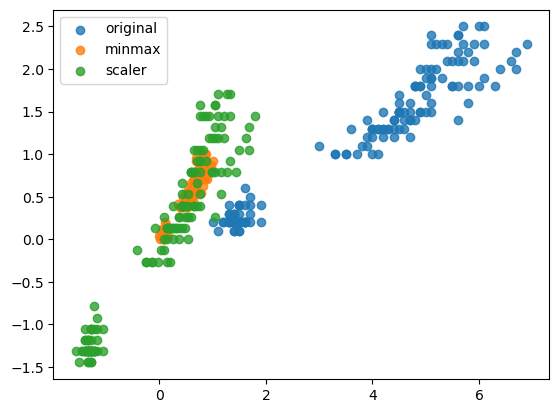

In [20]:
X = iris.data

X_scaler = StandardScaler().fit_transform(X)
X_minmax = MinMaxScaler().fit_transform(X)

plt.scatter(X[:, 2], X[:, 3], alpha=0.8, label = "original")
plt.scatter(X_minmax[:, 2], X_minmax[:, 3], alpha=0.8, label = "minmax")
plt.scatter(X_scaler[:, 2], X_scaler[:, 3], alpha=0.8, label = "scaler")
plt.legend()
plt.show()

On a une moyenne de toutes nos données qui est égale à zéro et on a un écart type pour chaque variable qui est égal à un. 

Moyenne : 1.38 - 0.46 - 0.92 = 0

Ecart type : 1

![Python_Seaborn_Fig_000112.png](./images/Python_Seaborn_Fig_000112.png)

Ces deux techniques sont très bien et on les utilise très souvent en machine learning. 

Néanmoins, ces deux techniques ont un gros inconvénient : elles sont sensibles aux valeurs aberrantes, ou outliers. 

Pour vous montrer ça, si on rajoute quelques valeurs aberrantes à la fin de notre dataset, disons 10 valeurs qui sont toutes aux alentours de 100, alors on obtient le nuage de points suivants. 

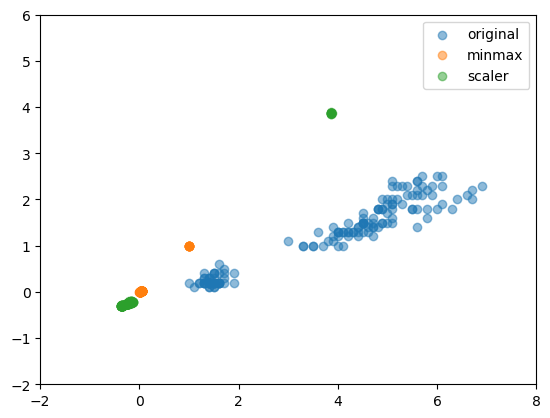

In [21]:
outliers = np.full((10,4), 100) + np.random.rand(10, 4)
X = np.vstack((X, outliers))

X_minmax = MinMaxScaler().fit_transform(X)
X_scaler = StandardScaler().fit_transform(X)

plt.scatter(X[:, 2], X[:, 3], alpha=0.5, label = "original")
plt.scatter(X_minmax[:, 2], X_minmax[:, 3], alpha=0.5, label = "minmax")
plt.scatter(X_scaler[:, 2], X_scaler[:, 3], alpha=0.5, label = "scaler")

plt.xlim(-2, 8)
plt.ylim(-2, 6)

plt.legend()
plt.show()

On pourrait se dire : "Waouh, mais qu'est-ce qui se passe ?". Et bien, ici il y a mes valeurs aberrantes et, si je zoome, on va retrouver le dataset des fleurs d'iris. 

Ce que l'on voit ici en haut, ce sont nos valeurs aberrantes. 

Si nous effectuons une normalisation en prenant en compte ces valeurs aberrantes, on va se retrouver avec le résultat suivant : les données qui ont subi la normalisation MinMax, ici en orange, et qui sont donc censées être toutes comprises entre 0 et 1, se retrouvent écrasées par la présence d'outliers. 

Cela les rend donc vraiment très difficiles à exploiter pour créer un modèle de machine learning. 
![Python_Seaborn_Fig_000113.png](./images/Python_Seaborn_Fig_000113.png)

Et on peut voir qu'on a exactement le même problème pour les données qui ont subi la standardisation : celles-ci sont devenues très difficiles à exploiter car elles se retrouvent extrêmement compressées pour obtenir une moyenne égale à zéro et un écart-type égal à 1, en considérant les outliers ici présents. 
![Python_Seaborn_Fig_000113.png](./images/Python_Seaborn_Fig_000114.png)

Conclusion : ces deux techniques de normalisation ne sont pas efficaces lorsque nous avons des valeurs aberrantes dans un dataset. 

Heureusement, dans cette situation, nous pouvons faire appel à un transformateur très peu sensible aux outliers : le RobustScaler.

## 9. RobustScaler

Ici, on ne soustrait pas nos données à la moyenne de chaque variable. 

À la place, on soustrait nos données à la médiane de chaque variable. Or, vous le savez, la médiane est beaucoup moins sensible aux outliers (ou "hautes valeurs", mais "outliers" est le terme couramment utilisé) que peut l'être une moyenne. 

Ensuite, au lieu de diviser par un écart type, on va diviser par l'interquartile de nos données, c'est-à-dire qu'on divise par l'écart qu'il y a dans nos données entre le troisième quartile et le premier quartile. 
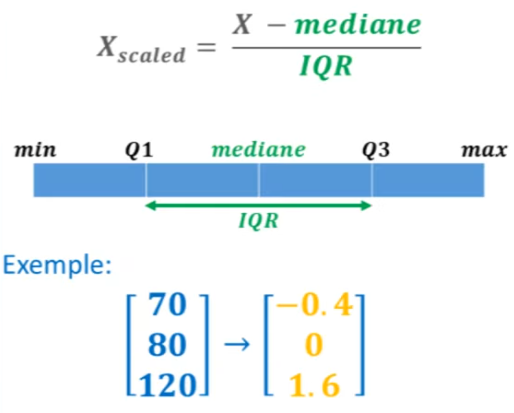

Donc, si on utilise ce RobustScaler pour transformer nos données en écrivant RobustScaler().fit_transform(X), alors on obtient des données qui sont bien plus faciles à exploiter que tout à l'heure. 

In [22]:
from sklearn.preprocessing import RobustScaler

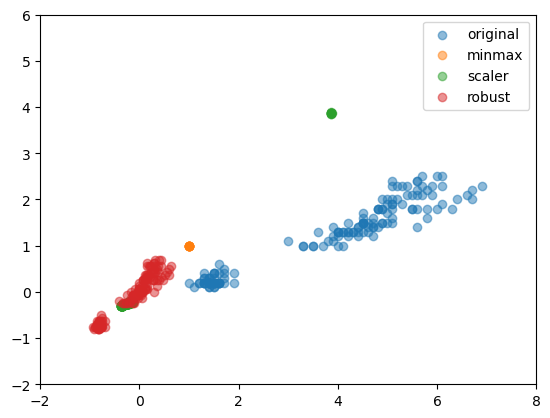

In [23]:
X_minmax = MinMaxScaler().fit_transform(X)
X_scaler = StandardScaler().fit_transform(X)
X_robust = RobustScaler().fit_transform(X)

plt.scatter(X[:, 2], X[:, 3], alpha=0.5, label = "original")
plt.scatter(X_minmax[:, 2], X_minmax[:, 3], alpha=0.5, label = "minmax")
plt.scatter(X_scaler[:, 2], X_scaler[:, 3], alpha=0.5, label = "scaler")
plt.scatter(X_robust[:, 2], X_robust[:, 3], alpha=0.5, label = "robust")

plt.xlim(-2, 8)
plt.ylim(-2, 6)

plt.legend()
plt.show()

Le but de ce scaler est donc de permettre une normalisation de nos données originales sans pour autant déformer nos données à cause de certains outliers. 

Donc, voilà pour les transformateurs de normalisation présents dans Scikit-learn. 
![Python_Seaborn_Fig_000116.png](./images/Python_Seaborn_Fig_000116.png)

Comme vous pouvez le voir, il en existe quelques autres, notamment un transformateur appelé Normalizer. Mais attention, celui-ci a la particularité de normaliser les lignes de votre dataset et non pas les colonnes. 

Sans entrer dans les détails, c'est une opération qui peut être utile si vous faites du natural language processing. Je ne vous conseille pas d'utiliser ce transformateur si vous débutez en data science ou en machine learning. 

À présent, je vais rapidement passer en revue les autres transformateurs que l'on trouve dans le module preprocessing.

## 10. PolynomialFeatures

Nous avons PolynomialFeatures qui est très utile pour créer des variables polynomiales à partir de nos variables existantes. C'est ce qu'on appelle faire du feature engineering, et cela permet de développer des modèles de machine learning plus riches et plus sophistiqués.
![Python_Seaborn_Fig_000117.png](./images/Python_Seaborn_Fig_000117.png)

Par exemple, si nous désirons développer un modèle polynomial de degré 2 à partir d'une seule variable x, le transformateur PolynomialFeatures va alors créer une colonne de valeurs égales à 1, une colonne x, et une colonne x au carré. 

Cela permettra à notre machine de trouver les paramètres a, b, et c d'un modèle polynomial $f(x) = ax^2 + bx + c$. 

In [24]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [25]:
X = np.array([[1], [2], [0.5]])

PolynomialFeatures(3).fit_transform(X)

array([[1.   , 1.   , 1.   , 1.   ],
       [1.   , 2.   , 4.   , 8.   ],
       [1.   , 0.5  , 0.25 , 0.125]])

On peut ainsi développer des modèles plus sophistiqués. 

Par exemple, j'ai ici le nuage de points suivant et, en développant un modèle de régression linéaire, le résultat que l'on obtient n'est pas très satisfaisant. 

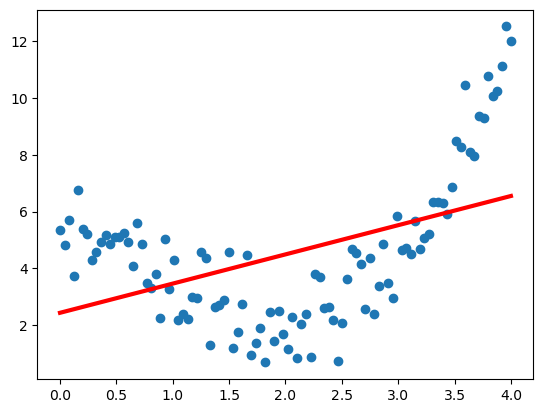

In [26]:
X = np.linspace(0, 4, 100).reshape((100, 1))
y = X**2 + 5*np.cos(X) + np.random.randn(100, 1)

plt.scatter(X, y)

model = LinearRegression().fit(X, y)
y_pred = model.predict(X)
                    
plt.plot(X, y_pred, c='r', lw=3)

Mais si je crée de nouvelles variables polynomiales à partir de mes variables existantes, en créant par exemple un degré 3, et que j'utilise ces variables dans un solveur linéaire, alors le résultat que je vais obtenir est beaucoup plus satisfaisant. 

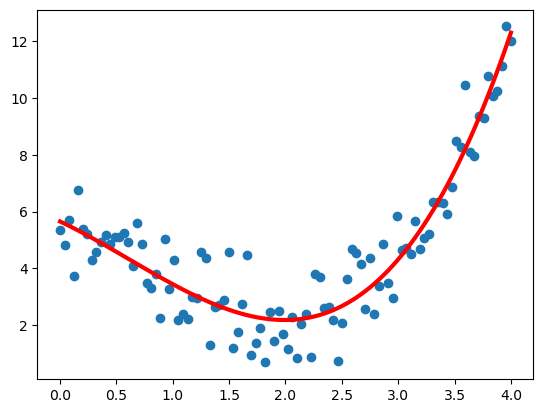

In [27]:
plt.scatter(X, y)

X_poly = PolynomialFeatures(3).fit_transform(X)

model = LinearRegression().fit(X_poly, y)
y_pred = model.predict(X_poly)
                    
plt.plot(X, y_pred, c='r', lw=3)

Maintenant, dans le cas où nous disposons de plusieurs variables, le transformateur PolynomialFeatures va créer toutes les combinaisons de variables possibles pour créer un polynôme. 

Sur un vrai dataset, cela peut être utile, par exemple pour combiner ensemble la surface d'un appartement avec le nombre de pièces qu'il y a dans cet appartement. 

Le fait de créer ainsi une nouvelle variable va parfois vous permettre de développer des modèles plus performants. 

Mais, bien sûr, il ne faut pas oublier de normaliser vos données après avoir utilisé PolynomialFeatures.
![Python_Seaborn_Fig_000118.png](./images/Python_Seaborn_Fig_000118.png)

Voilà donc pour le transformateur PolynomialFeatures.

Un autre type d'opération que l'on retrouve dans scikit-learn concerne les opérations de transformation non linéaire, comme PowerTransform ou QuantileTransform. 

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer

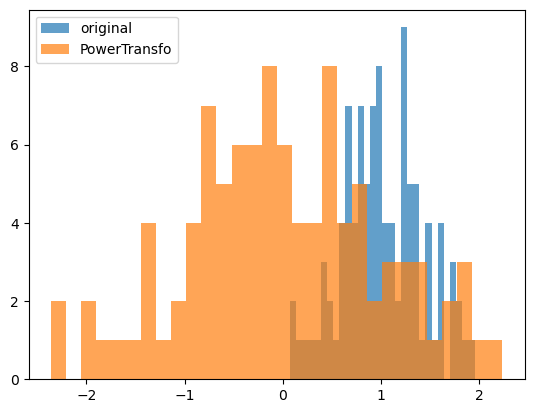

In [29]:
np.random.seed(0)
X= np.random.rand(100, 2) + np.random.rand(100, 2)

X2 = PowerTransformer().fit_transform(X)

plt.hist(X[:, 0], bins=30, alpha=0.7, label = "original")
plt.hist(X2[:, 0], bins=30, alpha=0.7, label = "PowerTransfo")

plt.legend()
plt.show()

Ces transformateurs permettent de traiter nos données pour leur donner une distribution plus normale ou gaussienne, ce qui facilite encore une fois l'apprentissage de certains modèles de machine learning.

## 11. Discretisation

Nous avons des transformers qui permettent de réaliser des opérations de discrétisation, c'est-à-dire de découper une variable continue en plusieurs parties. 

Ce type d'opération peut être très utile pour créer automatiquement des catégories dans une variable, comme par exemple différentes catégories d'âge à partir d'une variable qui recense différents âges. 

Pour cela, il existe deux transformateurs. Le plus simple est le Binarizer qui permet de diviser une variable en deux catégories selon un seuil que vous définissez. 

Par exemple, une variable x qui va de 0 à 5.

In [30]:
from sklearn.preprocessing import Binarizer, KBinsDiscretizer

In [31]:
X = np.linspace(0, 5, 10).reshape((10, 1))
X

array([[0.        ],
       [0.55555556],
       [1.11111111],
       [1.66666667],
       [2.22222222],
       [2.77777778],
       [3.33333333],
       [3.88888889],
       [4.44444444],
       [5.        ]])

Je peux utiliser Binarizer en définissant un seuil égal à 3 : tout ce qui sera inférieur à 3 sera converti en 0, et tout ce qui sera supérieur à 3 sera converti en 1. Le concept est très simple.

In [32]:
np.hstack((X, Binarizer(threshold = 3).fit_transform(X)))

array([[0.        , 0.        ],
       [0.55555556, 0.        ],
       [1.11111111, 0.        ],
       [1.66666667, 0.        ],
       [2.22222222, 0.        ],
       [2.77777778, 0.        ],
       [3.33333333, 1.        ],
       [3.88888889, 1.        ],
       [4.44444444, 1.        ],
       [5.        , 1.        ]])

L'autre transformateur de discrétisation est le KBinsDiscretizer. 

Celui-ci permet de réaliser exactement la même chose, mais en découpant notre variable en plus de deux catégories.

In [33]:
KBinsDiscretizer(n_bins= 6 ).fit_transform(X).toarray()

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]])

Voilà donc pour les opérations de discrétisation. 

Et pour finir, dans le module preprocessing, vous pouvez rencontrer un dernier transformateur. Celui-ci est en réalité un transformateur personnalisable. 

Vous pouvez y introduire n'importe quelle fonction, et cela vous retournera une fonction de transformation. 

In [34]:
from sklearn.preprocessing import FunctionTransformer

X = np.linspace(1, 5, 10).reshape((-1, 1))

In [35]:
mon_transformer = FunctionTransformer (func = np.log1p, inverse_func = np.expm1 )
mon_transformer.fit_transform(X)

array([[0.69314718],
       [0.89381788],
       [1.06087196],
       [1.2039728 ],
       [1.32913595],
       [1.44036158],
       [1.54044504],
       [1.63141682],
       [1.71479843],
       [1.79175947]])

Désormais, vous connaissez tous les transformateurs du module preprocessing de scikit-learn. 

Si vous débutez en machine learning, je vous conseille de retenir 
- LabelEncoder et OneHotEncoder pour les opérations d'encodage, 
- MinMaxScaler et StandardScaler pour les opérations de normalisation, 
- et éventuellement PolynomialFeatures, car il peut être utile. 

![Python_Seaborn_Fig_000119.png](./images/Python_Seaborn_Fig_000119.png)

Maintenant que vous connaissez tous ces transformateurs, il est temps de voir comment les combiner avec des estimateurs pour créer des modèles de machine learning vraiment performants.


## 12. Application : Pipelines

Dans Scikit-learn, il y a la classe "Pipelines". Comme on l'a vu au début de la vidéo, lorsqu'on développe un modèle de machine learning, 
1. on utilise d'abord les données du training set pour développer un ou plusieurs transformateurs. Ceux-ci nous permettent de traiter ces données, puis d'intégrer un estimateur.
![Python_Seaborn_Fig_000120.png](./images/Python_Seaborn_Fig_000120.png)

2. Une fois cette étape terminée, on utilise les transformateurs, tels qu'ils ont été développés, pour traiter les données de test. Ces données peuvent ensuite être fournies à notre estimateur pour réaliser ses prédictions.
![Python_Seaborn_Fig_000120.png](./images/Python_Seaborn_Fig_000121.png)

Si on essaie de reproduire ce processus en Python, par exemple sur le dataset des fleurs d'Iris, le code pourrait ressembler à ceci : 
1. on commence par diviser notre dataset en deux, le training set et le test set. 
2. Ensuite, on crée un transformateur, comme le "StandardScaler", pour traiter nos données du training set. 
3. Puis on développe notre estimateur, par exemple un de la classe "SGDClassifier", que l'on entraîne avec la méthode fit.

Si on souhaite utiliser notre modèle pour réaliser des prédictions sur le test set, on commence par transformer ces données à l'aide de notre "Scaler" et de la méthode transform. 

Puis, on utilise ces données transformées avec la méthode predict de notre modèle.


In [36]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split

In [37]:
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [38]:
#Transformer
scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train)

#Estimator
model = SGDClassifier(random_state = 0)
model.fit(X_train_transformed, y_train)

#Test
X_test_transformed = scaler.transform(X_test)
model.predict(X_test_transformed)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

Il y a toutefois une manière bien plus simple et efficace d'écrire ce code. L'idée est de regrouper notre transformateur et notre estimateur dans un pipeline. 
![Python_Seaborn_Fig_000123.png](./images/Python_Seaborn_Fig_000123.png)

On obtient alors un estimateur composite, c'est-à-dire composé de plusieurs éléments. 

Cet estimateur dispose, comme tous les autres, 
- d'une méthode fit, 
- d'une méthode predict, et 
- d'une méthode score. 

Lorsqu'on utilise la méthode fit, tous les composants de cet estimateur utilisent leur propre méthode fit. Ainsi, on entraîne nos transformateurs et notre estimateur en une seule ligne de code. 
![Python_Seaborn_Fig_000123.png](./images/Python_Seaborn_Fig_000124.png)

De la même façon, en utilisant la méthode predict de cet estimateur composite, tous les transformateurs transforment les données et l'estimateur en fin de chaîne réalise la prédiction.
![Python_Seaborn_Fig_000123.png](./images/Python_Seaborn_Fig_000125.png)


![Python_Seaborn_Fig_000123.png](./images/Python_Seaborn_Fig_000126.png)
Pour rédiger ce code sous forme de pipeline, nous allons créer un modèle avec la fonction "make_pipeline", dans lequel nous introduirons d'abord notre "StandardScaler". 

Ensuite, nous ajouterons notre "SGDClassifier". 

Il suffira ensuite d'utiliser la méthode fit sur notre modèle,

In [39]:
from sklearn.pipeline import make_pipeline

In [40]:
model = make_pipeline(StandardScaler(), SGDClassifier())
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier())])

puis soit la méthode score,

In [41]:
model.score(X_test, y_test)

0.9473684210526315

soit la méthode predict.

In [42]:
model.predict(X_test)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1])

L'utilisation d'un pipeline présente de nombreux avantages : 
1. c'est plus simple à lire et à utiliser, 
2. c'est plus sûr, et 
3. cela permet de réaliser des opérations de cross-validation sur l'intégralité de notre chaîne de transformation. 

Qui dit cross-validation dit forcément "GridSearchCV", et c'est ici que les pipelines montrent leur véritable potentiel. Vous pouvez optimiser toute une chaîne de transformation avec GridSearch.
![Python_Seaborn_Fig_000127.png](./images/Python_Seaborn_Fig_000127.png)

Pour cela, 
1. commencez par définir votre pipeline, 
2. le nombre de splits pour votre cross-validation, et 
3. un dictionnaire de paramètres dans lequel vous identifierez chaque paramètre à optimiser. 

Ensuite, utilisez "GridSearchCV" pour trouver les meilleurs paramètres et entraîner votre modèle.

In [43]:
from sklearn.model_selection import GridSearchCV

Nous allons recréer un modèle avec la fonction "make_pipeline" dans laquelle nous pourrons intégrer 
- "polynomial_features", puis
- intégrer une normalisation de "StandardScaler" et enfin 
- utiliser "SGDClassifier" que nous allons initialiser avec un "random_state" égal à zéro

In [44]:
model = make_pipeline(PolynomialFeatures(),
                      StandardScaler(),
                      SGDClassifier(random_state=0))
model

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier(random_state=0))])

Une fois notre pipeline créé, nous pouvons l'observer. Notre pipeline est structuré ainsi, avec différentes étapes. 

Si nous souhaitons créer notre dictionnaire de paramètres, nous allons, par exemple, ajouter des paramètres qui vont gérer le nombre de degrés présents dans "polynomial_features". 

Donc, nous écrirons "polynomial_features__degree" et déciderons de chercher entre 2, 3 et 4 degrés. 

Un autre paramètre sera, par exemple, le paramètre "penalty" de "SGDClassifier". Donc, nous écrirons "SGDClassifier__penalty".

In [45]:
params = {
    'polynomialfeatures__degree':[2, 3, 4],
    'sgdclassifier__penalty':['l1', 'l2']
}

Maintenant que nous avons défini notre dictionnaire, il ne reste plus qu'à créer notre grille de recherche "GridSearchCV", dans laquelle nous intégrerons notre modèle, notre dictionnaire de paramètres, et nous passerons un nombre de "split" pour la cross-validation, par exemple 4 splits.

In [46]:
grid = GridSearchCV(model, param_grid=params, cv=4)

À ce stade, il suffit d'utiliser notre grille de recherche avec la méthode "fit" sur nos données d'entraînement "X_train" et "Y_train". 

In [47]:
grid.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('standardscaler', StandardScaler()),
                                       ('sgdclassifier',
                                        SGDClassifier(random_state=0))]),
             param_grid={'polynomialfeatures__degree': [2, 3, 4],
                         'sgdclassifier__penalty': ['l1', 'l2']})

Si tout se passe bien, nous pourrons voir quels sont nos meilleurs paramètres. 

In [48]:
grid.best_params_

{'polynomialfeatures__degree': 4, 'sgdclassifier__penalty': 'l1'}

Nos meilleurs paramètres, dans ce cas, sont 4 degrés avec une pénalité "L1", 

In [49]:
grid.score(X_test, y_test)

0.9736842105263158

et nous obtenons une performance de 97%. C'est vraiment impressionnant!

Vous vous demandez peut-être quelle serait la performance de notre modèle sans preprocessing, sans normalisation, et sans tout ce que nous avons discutéo.

Si nous utilisons une base simple, c'est-à-dire en créant un modèle "SGDClassifier" avec un "random_state" égal à 0 et que nous l'entraînons sur "X_train" et "Y_train", puis que nous l'évaluons sur "X_test", sans aucune transformation, nous obtenons un score de 84%. 

In [50]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split

In [51]:
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [52]:
model = SGDClassifier(random_state = 0)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8421052631578947

La différence entre 84% et 97%, soit 13%, est énorme en data science. 

Gardez à l'esprit qu'en machine learning, la qualité de vos données, leur quantité et le preprocessing sont essentiels à la réussite.

## 13. Pipeline avancée

Si vous voulez montrer comment développer un pipeline, disons pour une régression, rappelez-vous d'abord de bien connaître le dataset. 

Chaque dataset contient des types de variables, certaines sont continues tandis que d'autres sont discrètes. 

Nous présentons une démo pour développer un modèle. Nous allons utiliser différentes fonctions, dont
- "make_column_transformer", 
- "make_column_selector" et d'autres fonctions linéaires comme 
- "make_union".

Utilisons un exemple de dataset réel. 

## 13.1 make_column_transformer, make_column_selector

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
import seaborn as sns

In [54]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [55]:
titanic['deck'] = titanic['deck'].astype(str)
titanic['sex'] = titanic['sex'].astype(str)
titanic['embarked'] = titanic['embarked'].astype(str)
titanic['class'] = titanic['class'].astype(str)
titanic['who'] = titanic['who'].astype(str)
titanic['adult_male'] = titanic['adult_male'].astype(str)
titanic['embark_town'] = titanic['embark_town'].astype(str)
titanic['alive'] = titanic['alive'].astype(str)
titanic['alone'] = titanic['alone'].astype(str)

y = titanic['survived']
X = titanic.drop('survived', axis=1)


Comment allez-vous diviser ce dataset en différents sous-ensembles ? 

Par exemple, si vous avez une variable continue comme l'âge et une variable discrète comme le sexe, comment allez-vous traiter ces variables différemment ? 

Ce code ci-dessous va retourner une erreur car on ne peut pas transformer la colonne se, class...

In [56]:
#model = make_pipeline(StandardScaler(), SGDClassifier())
#model.fit(X, y)

![Python_Seaborn_Fig_000130.png](./images/Python_Seaborn_Fig_000130.png)

Nous allons devoir créer dans le pipeline un méchanisme qui permet de trier les colonnes afin de donner des colonnes à certains transformer et des colonnes à d'autre transformer.

Et pour faire cela, nous utiliser make_column_transformer.
![Python_Seaborn_Fig_000130.png](./images/Python_Seaborn_Fig_000131.png)

Cette démonstration va montrer comment résoudre certains problèmes potentiels qui peuvent survenir lors de la mise en place d'un pipeline. Il est essentiel de comprendre comment chaque transformateur fonctionne. Par exemple, la fonction "make_column_transformer" du module "scikit-learn" permet d'appliquer différentes transformations aux colonnes de votre dataset.


In [57]:
from sklearn.compose import make_column_transformer

In [58]:
# Nous créons un tranformer de colonnes age et fare
transformer = make_column_transformer((StandardScaler(), ['age', 'fare']))

In [59]:
#Nous entrainons le transformer avec la méthode fit
transformer.fit_transform(X) #il ne va pas traiter tout le tableau mais uniquement les colonnes ages et fare

array([[-0.53037664, -0.50244517],
       [ 0.57183099,  0.78684529],
       [-0.25482473, -0.48885426],
       ...,
       [        nan, -0.17626324],
       [-0.25482473, -0.04438104],
       [ 0.15850313, -0.49237783]])

Au lieu d'utiliser le transformer en tant que tel, nous allons l'utiilser dans notre Pipeline.Donc on va utliser StandardScaler à travers notre transformer qui est en colonne transformer.

Mais d'abord, on va créer d'autres transformer, pour faire le tri entre les colonnes catégorielles et les colonnes numériques.
![Python_Seaborn_Fig_000132.png](./images/Python_Seaborn_Fig_000132.png)


In [60]:
numerical_features = ['pclass', 'age', 'fare']
categorical_features = ['sex', 'deck', 'alone']    

Nous allons créer deux pipeline, une pour les valeurs numériques et les valeurs categorielles.
![Python_Seaborn_Fig_000133.png](./images/Python_Seaborn_Fig_000133.png)

In [61]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

numerical_pipeline = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())
categorical_pipeline = make_pipeline(SimpleImputer(strategy="most_frequent"), OneHotEncoder())

Ensuite ces deux pipelines, nous allons les assembler dans le make_colum_transformer.
![Python_Seaborn_Fig_000134.png](./images/Python_Seaborn_Fig_000134.png)

Tout cela va nous donner un transformer que nous appelons preprocessor.

In [62]:
preprocessor = make_column_transformer((numerical_pipeline, numerical_features), 
                                       (categorical_pipeline, categorical_features))

Il nous reste à créer notre pipeline finale. 
![Python_Seaborn_Fig_000134.png](./images/Python_Seaborn_Fig_000135.png)

In [63]:
model = make_pipeline(preprocessor, SGDClassifier())
model.fit(X, y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['pclass', 'age', 'fare']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['sex', 'deck', 'alone'])])),
                ('sgdclassifier', SGDClassifier())])

Pour résumer :
1. Il faut faire le tri entre les variables numériques et non-numériques
2. Nous définissons, pour chaque type de variable, une pipeline c'est à dire une chaîne de transformation que ces variables doivent subir
3. Pour finir, nous injectons ces pipeline dans la fonction make_column_transformer. Ce qui nous retourne un preprocessor.
5. Et on inject ce preprocessor dans notre pipeline qui définit le model de machine learning.

A savoir qu'il y a une nouvelle fonction dans le module compose qui est make_column_selectore.
![Python_Seaborn_Fig_000136.png](./images/Python_Seaborn_Fig_000136.png)

Cette fonction permet, non pas de sélectionner les variables de façon explicite, mais de directement sélectionner le type de varibale : numérique, catégoriel, et même sélectionner une variable en suivant un pattern sur son nom.

In [64]:
from sklearn.compose import make_column_selector

numerical_features = make_column_selector(dtype_include=np.number)
categorical_features = make_column_selector(dtype_exclude=np.number)

numerical_pipeline = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())
categorical_pipeline = make_pipeline(SimpleImputer(strategy="most_frequent"), OneHotEncoder())

preprocessor = make_column_transformer((numerical_pipeline, numerical_features), 
                                       (categorical_pipeline, categorical_features))

model = make_pipeline(preprocessor, SGDClassifier())
model.fit(X, y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001F982F03820>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001F982F037C0>)])),
                ('sgdclassifier', SGDClassifier())])

## 13.2 make_union

Jusqu'ici nous avons créer nos pipeline en mettant bout à bout plusieurs transformer. Pour crée ainsi, une série de transformers.

Mais avec sklean, il es possible de créer des pipeline qui mettent en parallèle plusieurs transformers et qui rejoint le résultat dans un seul et même tableau.
![Python_Seaborn_Fig_000137.png](./images/Python_Seaborn_Fig_000137.png)

Nous allons utiliser un exemple pour illuster le make_union. Nous allons simplement utiliser la colonne age et fare de notre dataset.

In [65]:
titanic['age'].fillna(titanic['age'].median(), inplace=True)
titanic['age'] = titanic['age'].astype(int)

titanic['fare'].fillna(titanic['fare'].median(), inplace=True)
titanic['fare'] = titanic['fare'].astype(float)

X = titanic.drop('survived', axis=1)

numerical_features = X[['age', 'fare']]

In [66]:
from sklearn.pipeline import make_union

Nous allons entrer les transfomer que nous voulons voir tourner en parralèle.

1. Nous allons d'abord standardiser les deux variables et
2. en parralèe, nous allons dicsretiser ces variables abec la classe Binarizer

In [67]:
pipeline = make_union(StandardScaler(), Binarizer())

Et maintenant, nous pouvons utiliser ce pipeline avec .fit_transform(), dans lequel on fait passer numerical_features.

In [68]:
pipeline.fit_transform(numerical_features)

array([[-0.56414531, -0.50244517,  1.        ,  1.        ],
       [ 0.66464851,  0.78684529,  1.        ,  1.        ],
       [-0.25694686, -0.48885426,  1.        ,  1.        ],
       ...,
       [-0.10334763, -0.17626324,  1.        ,  1.        ],
       [-0.25694686, -0.04438104,  1.        ,  1.        ],
       [ 0.20385083, -0.49237783,  1.        ,  1.        ]])

Le résultat contient 4 colonnes qui semblent difficile à lire, nous allons imprimer les dimenssions.

In [69]:
pipeline.fit_transform(numerical_features).shape

(891, 4)

![Python_Seaborn_Fig_000138.png](./images/Python_Seaborn_Fig_000138.png)

Nous avons 891 lignes à traiter en 4 colonnes avec les deux premières colonnes de standardisées et les deux suivantes discrétisées.

## 14. Nettoyage des données : IMPUTER

Je vais vous présenter les transformers que l'on trouve dans le module imputer de Scikit-Learn. 

Comme leurs noms l'indiquent, ces transformers permettent de nettoyer notre dataset en éliminant ou remplaçant les valeurs manquantes présentes dedans. 

Pour cela, on compte plusieurs transformers : le SimpleImputer, le KNNImputer et un autre transformer qui est le IterativeImputer. Et pour finir, un dernier transformer assez intéressant : le MissingIndicator.

### 14.1 SimpleImputer

Pour commencer, je vais vous présenter le transformer le plus simple à comprendre, il s'agit du SimpleImputer. 

C'est très simple, quand on utilise ce transformer, il faut commencer par indiquer quelles sont les valeurs manquantes dans notre dataset. 

En général, elles sont indiquées par np.nan, mais il peut arriver, lorsque vous travaillez sur un vrai dataset, d'avoir comme valeur manquante des valeurs négatives, par exemple -99, ou bien l'infini. 

Toutes ces choses peuvent être considérées comme des valeurs manquantes. Donc, cela va être votre travail d'identifier quelles valeurs manquantes vous cherchez à nettoyer. 

Vous pouvez créer plusieurs séries de SimpleImputer pour filtrer plusieurs types de variables. Et une fois que vous avez identifié ces valeurs, ce que vous devez faire, c'est également définir une stratégie pour remplacer ces valeurs. Il existe quatre grandes stratégies : vous pouvez remplacer les valeurs numériques par 
1. la moyenne, 
2. la médiane, 
3. les valeurs les plus fréquentes ou, pour finir, 
4. vous pouvez aussi remplacer vos valeurs par une constante en précisant quelle constante utiliser.

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import SGDClassifier   

In [71]:
from sklearn.impute import SimpleImputer

In [72]:
X = np.array([[10, 3],
              [0, 4],
              [5, 3],
             [np.nan, 3]])

In [73]:
imputer = SimpleImputer(missing_values=np.nan,
             strategy='mean')

Ainsi, lorsqu'on utilise la méthode fit_transform de notre imputer pour transformer nos données X, la moyenne de la première colonne est calculée. 
![Python_Seaborn_Fig_000140.png](./images/Python_Seaborn_Fig_000140.png)

In [74]:
imputer.fit_transform(X)

array([[10.,  3.],
       [ 0.,  4.],
       [ 5.,  3.],
       [ 5.,  3.]])

Par exemple, cela nous donne 5. Et la moyenne de la deuxième colonne est aussi calculée. Mais comme il n'y a pas de valeurs manquantes à remplacer dans celle-ci, nous n'observons pas la moyenne de cette colonne. 

Par la suite, si nous avons d'autres données à traiter, par exemple des données du test, on pourra également utiliser notre transformer. Cela aura pour effet de remplacer les valeurs manquantes de notre test par les moyennes qui ont été calculées sur le train.
![Python_Seaborn_Fig_000141.png](./images/Python_Seaborn_Fig_000141.png)

In [75]:
X_test = np.array([[12, 5],
                   [40, 2],
                   [5, 5],
                   [np.nan, np.nan]])

imputer.transform(X_test)

array([[12.  ,  5.  ],
       [40.  ,  2.  ],
       [ 5.  ,  5.  ],
       [ 5.  ,  3.25]])

Cela peut sembler un peu étrange car dans notre test, la moyenne de la première colonne n'est pas égale à 5, mais c'est le principe d'un transformer. 

Rappelez-vous, le but est de traiter l'ensemble de nos données de façon cohérente, en traitant toutes les données futures de la même manière que celles du train. 

Vous pourriez vous demander pourquoi on ne rassemble pas ensemble le train et le test pour calculer une moyenne plus générale. Cela pourrait être une bonne idée, mais si on fait cela, nous aurions une fuite d'information du test vers le train. Cela signifierait que d'une certaine manière, certaines informations du test seraient utilisées pour entraîner un modèle de machine learning. Ce genre de pratique est déconseillé.
![Python_Seaborn_Fig_000142.png](./images/Python_Seaborn_Fig_000142.png)


### 14.2 KNNImputer

À présent, un autre transformer très intéressant est le KNNImputer. 

Le KNNImputer est simple à comprendre : il remplace les valeurs manquantes associées à un certain échantillon par les valeurs des échantillons les plus similaires. 
![Python_Seaborn_Fig_000142.png](./images/Python_Seaborn_Fig_000143.png)

Donc, si par exemple nous avons un passager du Titanic dont nous ignorons la classe, mais dont nous connaissons l'âge et le prix du ticket, en le comparant aux autres passagers du Titanic, nous pourrons deviner dans quelle classe ce passager a voyagé. 
![Python_Seaborn_Fig_000142.png](./images/Python_Seaborn_Fig_000144.png)

In [76]:
from sklearn.impute import KNNImputer

In [77]:
X = np.array([[1, 100],
             [2, 30],
             [3, 15],
             [np.nan, 20]])

imputer = KNNImputer(n_neighbors=1)
imputer.fit_transform(X)

array([[  1., 100.],
       [  2.,  30.],
       [  3.,  15.],
       [  3.,  20.]])

C'est donc un algorithme de K-Nearest Neighbors classique, où nous choisissons un nombre de voisins à considérer. Cet algorithme, lorsqu'il est entraîné sur nos données, va analyser quelles sont les données les plus similaires à un échantillon pour lequel il manque une information, et remplacera cette information manquante par la valeur des échantillons les plus semblables. 

Je trouve que ce transformer est vraiment très intéressant, surtout si utilisé avec un algorithme de GridSearchCV, où l'on essaie de trouver le nombre optimal de voisins pour notre transformation.

### 14.3 MissingIndicator

Ce transformateur peut, à première vue, sembler un peu inutile. En effet, son but est simplement de nous indiquer où il manque des données dans d'autres datasets. 
![Python_Seaborn_Fig_000145.png](./images/Python_Seaborn_Fig_000145.png)

Par exemple, si on reprend le tableau que j'ai utilisé pour l'exemple du Titanic, cela nous indique qu'à la quatrième ligne, il nous manque une information pour la classe et une pour l'âge du passager. 

In [78]:
from sklearn.impute import MissingIndicator
from sklearn.pipeline import make_union

In [79]:
X = np.array([[1, 100],
             [2, 30],
             [3, 15],
             [np.nan, np.nan]])

MissingIndicator().fit_transform(X)   

array([[False, False],
       [False, False],
       [False, False],
       [ True,  True]])

Maintenant, imaginez que cet échantillon ne corresponde pas à un passager, mais à un matelot à bord du navire. 
![Python_Seaborn_Fig_000146.png](./images/Python_Seaborn_Fig_000146.png)

Il est évident que ce matelot n'a pas payé de ticket et ne voyage ni en première, ni en deuxième, ni en troisième classe. C'est un membre d'équipage. Par conséquent, il peut être très utile de créer une colonne parallèle dans notre dataset qui indiquerait si oui ou non il nous manque certaines informations pour un échantillon donné. 

Dans notre cas, cette colonne nous indiquerait si un certain individu est un passager ou un membre d'équipage. 

Pour créer une telle colonne, on peut utiliser l'une des fonctions sur les pipelines avancés, c'est la fonction "make_column_transformer" qui nous permet de traiter différemment plusieurs données dans un dataset, c'est-à-dire de les traiter en parallèle puis de concaténer nos résultats dans un seul tableau. 
![Python_Seaborn_Fig_000146.png](./images/Python_Seaborn_Fig_000147.png)

Donc, ici, on pourrait créer un 'pipeline' avec la fonction "make_column_transformer" dans laquelle, d'un côté, on aurait un "SimpleImputer" qui remplace nos valeurs manquantes par -99. Dans ce cas, on dirait que notre stratégie est "constant" et que notre fill_value est -99. 

In [80]:
pipeline = make_union(SimpleImputer(strategy='constant', fill_value=-99),
                     MissingIndicator())

pipeline.fit_transform(X)

array([[  1., 100.,   0.,   0.],
       [  2.,  30.,   0.,   0.],
       [  3.,  15.,   0.,   0.],
       [-99., -99.,   1.,   1.]])

Voilà pour notre "SimpleImputer". Et en parallèle, ce que nous pourrions avoir, c'est ce "MissingIndicators". 

En traitant nos données avec ce pipeline, nous obtiendrions le résultat suivant : 
- d'un côté, les colonnes qui ont subi le traitement de "SimpleImputer", où nous conservons les informations sur la classe du passager ainsi que le prix de son ticket, et 
- de l'autre, le fait que l'individu soit un passager ou un membre d'équipage. 

Cet exemple est là pour vous montrer qu'il arrive souvent d'avoir des datasets dans lesquels le manque d'information devient une information en soi que l'on peut utiliser pour entraîner un modèle. 

Vous connaissez maintenant les différents transformateurs présents dans le module "impute" de scikit-learn. 

### 14.4 Application

Pour finir, j'aimerais vous montrer une application avec ces différents transformateurs, ce qui pourrait vous aider à comprendre dans quelle situation ces transformateurs peuvent être utiles, plutôt que d'utiliser simplement la fonction "fillna" de pandas, qui permet aussi de faire une opération comme "SimpleImputer". 

Donc, pour cela, je vous propose de charger le dataset du Titanic et de filtrer ce dataset en utilisant seulement les colonnes des classes, âge et "SibSp", histoire de simplifier un peu l'exemple. 

In [81]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, train_test_split

À partir de là, on crée un "train set" ainsi qu'un "test set", les étapes classiques. 

In [82]:
titanic = sns.load_dataset('titanic')
X = titanic[['pclass', 'age']]
y = titanic['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Ensuite, je vous suggère de créer un pipeline qui va contenir un "KNNImputer" ainsi qu'un algorithme de "SGDClassifier". 

In [83]:
model = make_pipeline(KNNImputer(), SGDClassifier())

Pour rester simple, ce qui sera intéressant dans l'utilisation du "KNNImputer" plutôt que d'utiliser une fonction de pandas pour l'imputation, c'est la possibilité d'utiliser notre transformateur avec "GridSearchCV" pour optimiser ses paramètres. 

Comme nous l'avons vu précédemment, pour faire cela, 

1. il faut commencer par créer un dictionnaire de paramètres dans lequel nous chercherons à optimiser le paramètre "n_neighbors" de l'étape "KNNImputer". 

Donc, nous écrirons "KNNImputer__n_neighbors" et ensuite, nous pourrions ajouter un autre paramètre à optimiser, comme un paramètre de "SGDClassifier", mais pour rester simple, nous nous concentrerons uniquement sur le nombre de voisins de notre "KNNImputer". 

In [84]:
params = {'knnimputer__n_neighbors' : [1, 2, 3, 4]}

2. À partir de là, nous pouvons créer un "GridSearchCV" dans lequel nous ferons passer notre pipeline et notre dictionnaire de paramètres. 

Nous écrirons "param_grid = params" et nous utiliserons, par exemple, une validation croisée à 5 plis. 


In [85]:
grid = GridSearchCV(model, param_grid=params, cv=5)

3. Et enfin, une fois cette grille définie, nous l'entraînerons avec "X_train" et "y_train", en espérant qu'il n'y ait pas d'erreurs. 

In [86]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('knnimputer', KNNImputer()),
                                       ('sgdclassifier', SGDClassifier())]),
             param_grid={'knnimputer__n_neighbors': [1, 2, 3, 4]})

Parfait ! Ensuite, nous pourrons observer les meilleurs paramètres de notre grille, qui seront trois voisins. 

In [87]:
grid.best_params_

{'knnimputer__n_neighbors': 3}

Nous avons pu optimiser le nombre de paramètres pour notre "KNNImputer" grâce à l'algorithme de "GridSearchCV", une chose qui ne serait pas possible si nous utilisions une autre méthode qui provient de pandas. 

Voilà, vous connaissez maintenant les trois principaux transformateurs du module "impute" de scikit-learn.